In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix


# Use of supervised model

# Use of supervised model

## Data preprocessing

###  - Filling in missing data (data imputation)

In [21]:

# Load the datasets

titles_df = pd.read_csv("titles.csv")

# Check for missing values in the dataset
missing_values = titles_df.isnull().sum()

missing_values


id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64


- For title and description, consider removing these missing values as they are fewer in number.
- For age_certification, populate it with a special value such as "Unknown".
- For seasons, fill with 0 to indicate that it is a movie and not a TV show.
- For imdb_id, since it is a unique identifier, it does not need to be processed.
- For rating and voting columns (e.g., imdb_score, imdb_votes, tmdb_popularity, tmdb_score), consider removing these missing values instead of populating with the median so that it won't bias the dataset.



In [22]:
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [23]:
# Handling missing values

# Drop rows with missing title and description
titles_df.dropna(subset=['title', 'description','imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'], inplace=True)

# Fill missing values in age_certification with 'Unknown'
titles_df['age_certification'].fillna('Unknown', inplace=True)

# Fill missing values in seasons with 0
titles_df['seasons'].fillna(0, inplace=True)

# Check for missing values again
missing_values_updated = titles_df.isnull().sum()

missing_values_updated



id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

/var/folders/qt/xbrgbyzj1hncwmh783m4d5g40000gn/T/ipykernel_3340/1248835922.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titles_df, x='type', ax=ax1, palette="Set2")


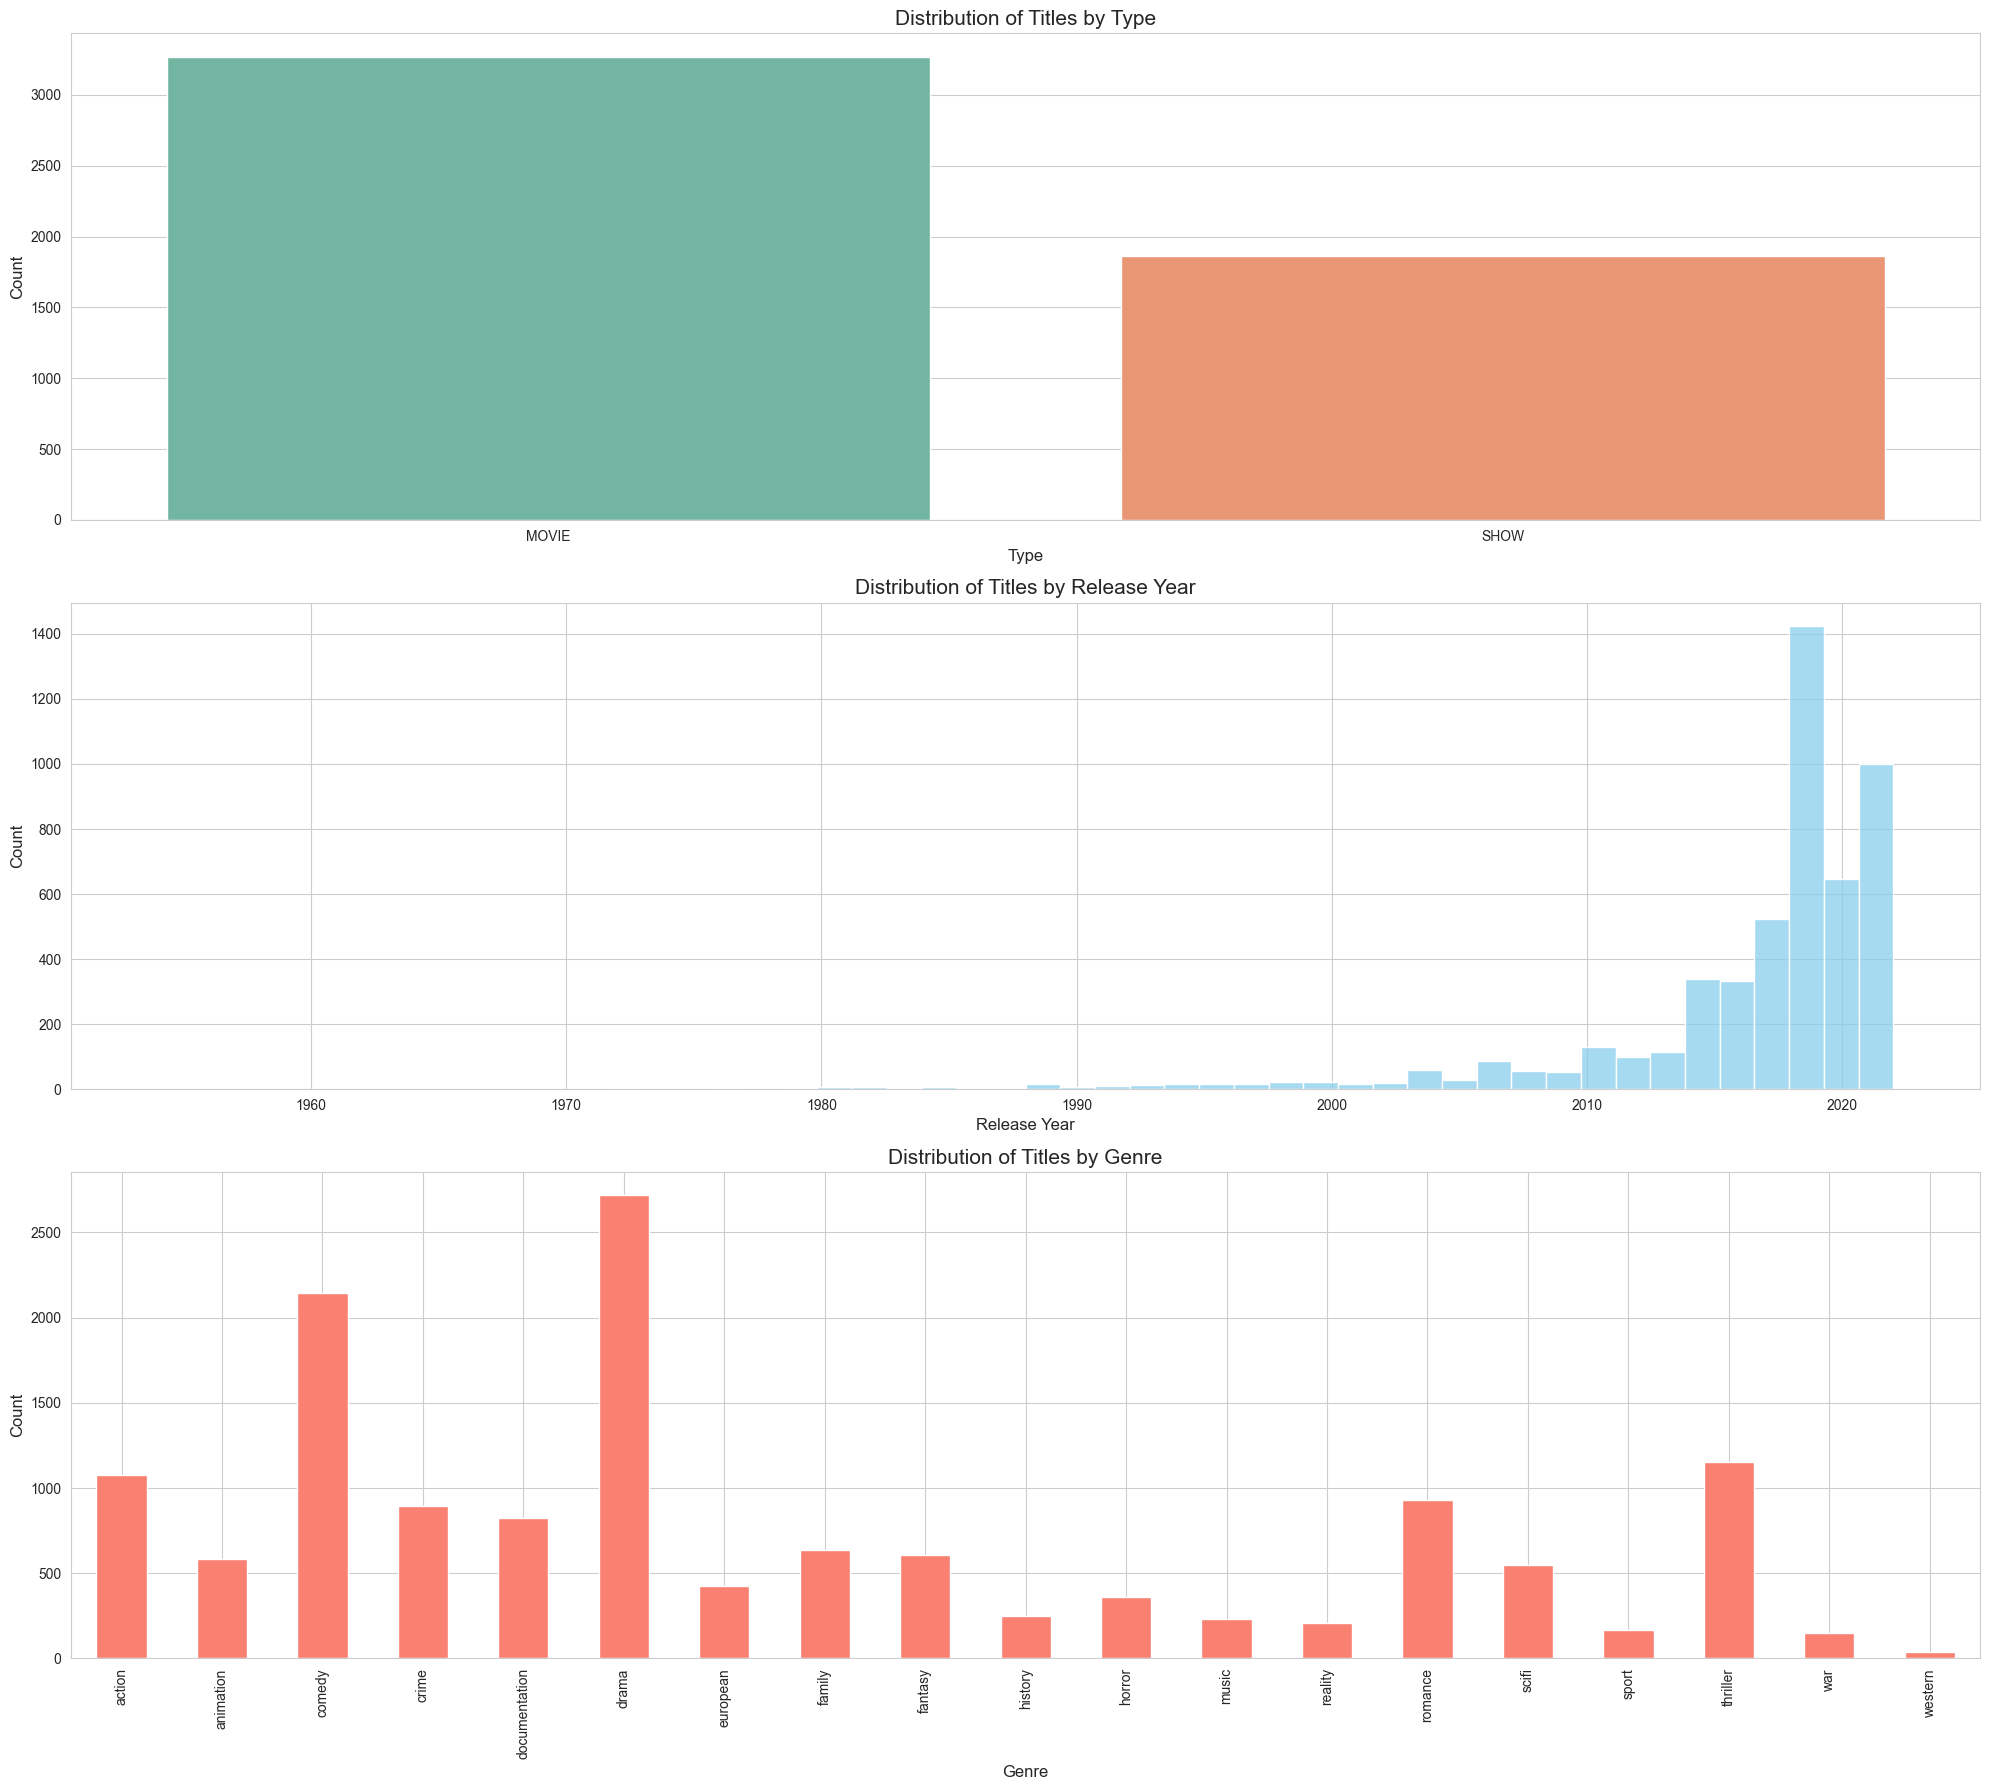

In [24]:


# Setting the style for the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 18))

# Create subplots
ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2)
ax3 = plt.subplot(3, 1, 3)

# Plot the distribution of types (Movie vs. Show)
sns.countplot(data=titles_df, x='type', ax=ax1, palette="Set2")
ax1.set_title("Distribution of Titles by Type", fontsize=15)
ax1.set_xlabel("Type", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

# Plot the distribution of titles by release year
sns.histplot(titles_df['release_year'], bins=50, ax=ax2, color="skyblue")
ax2.set_title("Distribution of Titles by Release Year", fontsize=15)
ax2.set_xlabel("Release Year", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

# Plot the distribution of titles by genre
generes_list = titles_df['genres'].apply(ast.literal_eval)
# Perform one-hot encoding on the genres
genres_dummies = pd.get_dummies(generes_list.apply(pd.Series).stack()).sum()
genres_sum = genres_dummies
genres_sum.plot(kind='bar', ax=ax3, color="salmon")
ax3.set_title("Distribution of Titles by Genre", fontsize=15)
ax3.set_xlabel("Genre", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


- Distribution of title types: most titles are movies, a smaller number are television programs.
- Distribution of titles by year of release: Most titles were released in recent years, but there were some titles from earlier years.
- Distribution of titles by genre: Some genres (e.g. drama, comedy, action) are more popular than others.


/var/folders/qt/xbrgbyzj1hncwmh783m4d5g40000gn/T/ipykernel_3340/2331290923.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, palette="viridis")


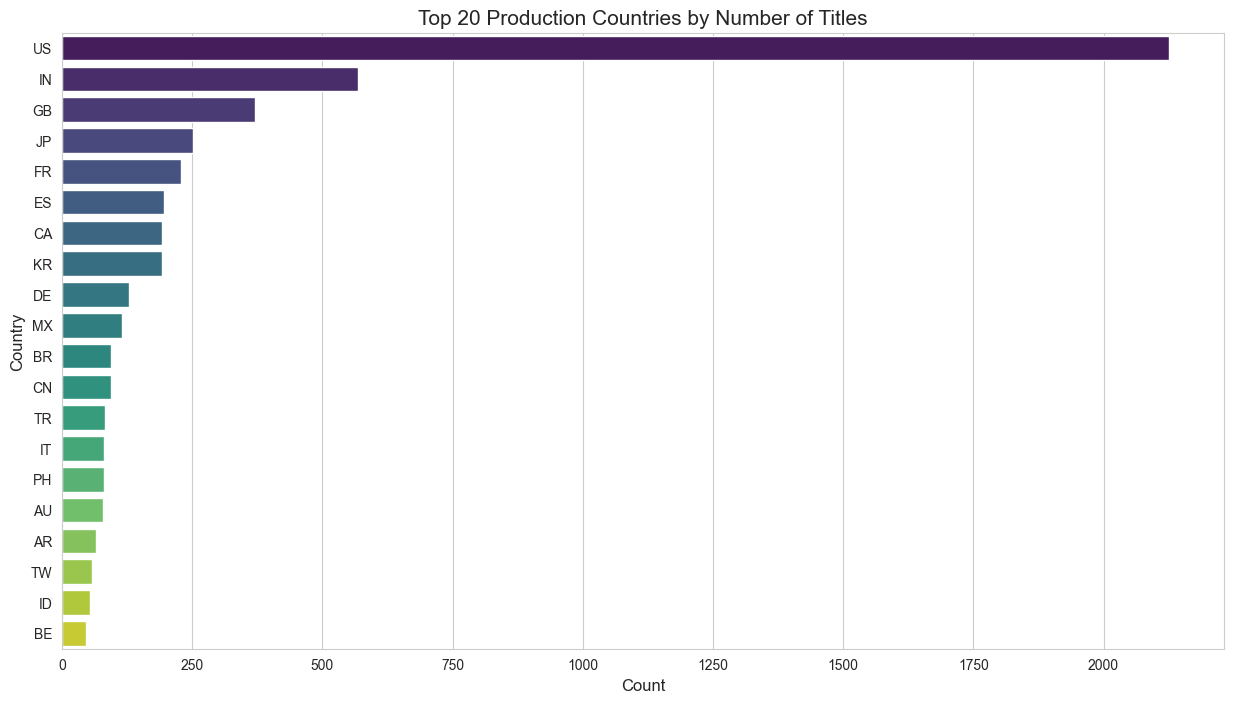

In [25]:
# Convert string representation of list to actual list for 'production_countries'
titles_df['production_countries_list'] = titles_df['production_countries'].apply(ast.literal_eval)

# Explode the dataframe on 'production_countries' to have one country per row
titles_df_exploded = titles_df.explode('production_countries_list')

# Visualize the distribution of titles by production country
plt.figure(figsize=(15, 8))
country_counts = titles_df_exploded['production_countries_list'].value_counts().head(20)
sns.barplot(y=country_counts.index, x=country_counts.values, palette="viridis")
plt.title("Top 20 Production Countries by Number of Titles", fontsize=15)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.show()


As shown in the graph above, the distribution of the number of titles in the top 20 producing countries/regions is displayed. 

/var/folders/qt/xbrgbyzj1hncwmh783m4d5g40000gn/T/ipykernel_3340/2923902623.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_tmdb_countries.index, x=top_tmdb_countries['tmdb_popularity'], palette="coolwarm", ax=ax1)
/var/folders/qt/xbrgbyzj1hncwmh783m4d5g40000gn/T/ipykernel_3340/2923902623.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_imdb_countries.index, x=top_imdb_countries['imdb_score'], palette="cool", ax=ax2)


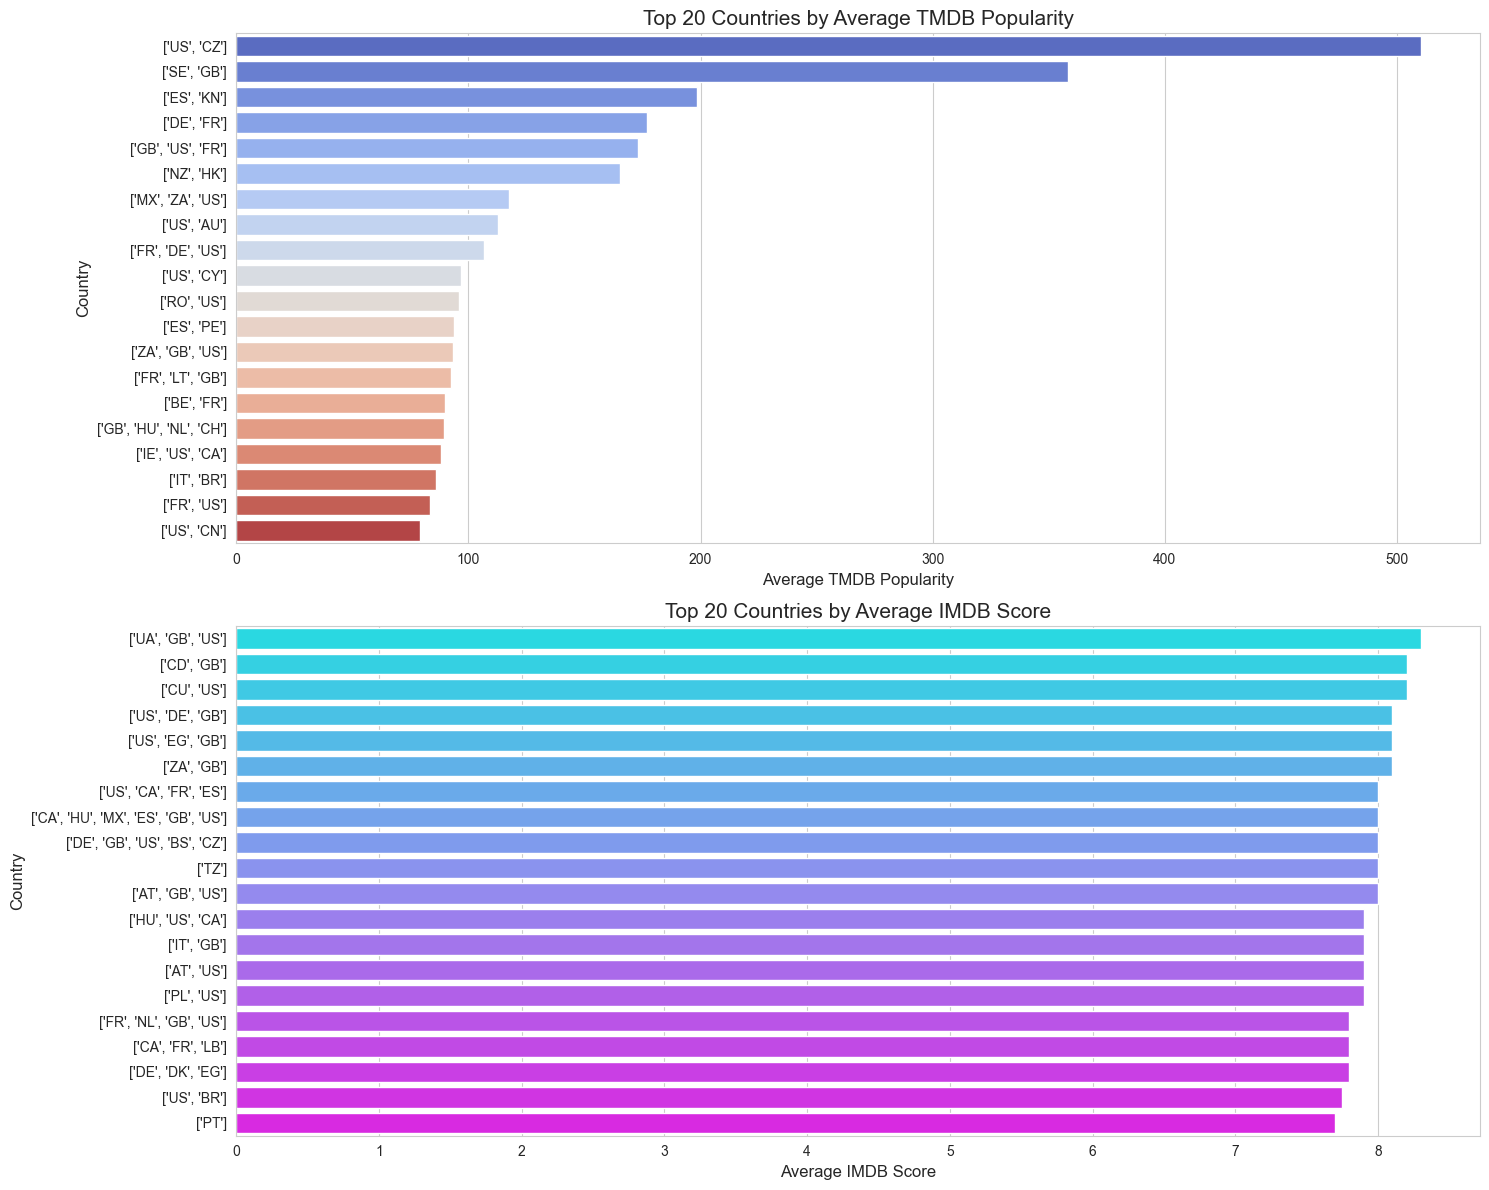

In [26]:
# Calculate the average tmdb_popularity and imdb_score for each country
average_scores = titles_df_exploded.groupby('production_countries')[['tmdb_popularity', 'imdb_score']].mean()

# Top 20 countries by average tmdb_popularity
top_tmdb_countries = average_scores.sort_values('tmdb_popularity', ascending=False).head(20)

# Top 20 countries by average imdb_score
top_imdb_countries = average_scores.sort_values('imdb_score', ascending=False).head(20)

# Plotting
plt.figure(figsize=(15, 12))

# TMDB Popularity
ax1 = plt.subplot(2, 1, 1)
sns.barplot(y=top_tmdb_countries.index, x=top_tmdb_countries['tmdb_popularity'], palette="coolwarm", ax=ax1)
ax1.set_title("Top 20 Countries by Average TMDB Popularity", fontsize=15)
ax1.set_xlabel("Average TMDB Popularity", fontsize=12)
ax1.set_ylabel("Country", fontsize=12)

# IMDB Score
ax2 = plt.subplot(2, 1, 2)
sns.barplot(y=top_imdb_countries.index, x=top_imdb_countries['imdb_score'], palette="cool", ax=ax2)
ax2.set_title("Top 20 Countries by Average IMDB Score", fontsize=15)
ax2.set_xlabel("Average IMDB Score", fontsize=12)
ax2.set_ylabel("Country", fontsize=12)

plt.tight_layout()
plt.show()


We show the average TMDB popularity and IMDB ratings for different countries/regions.



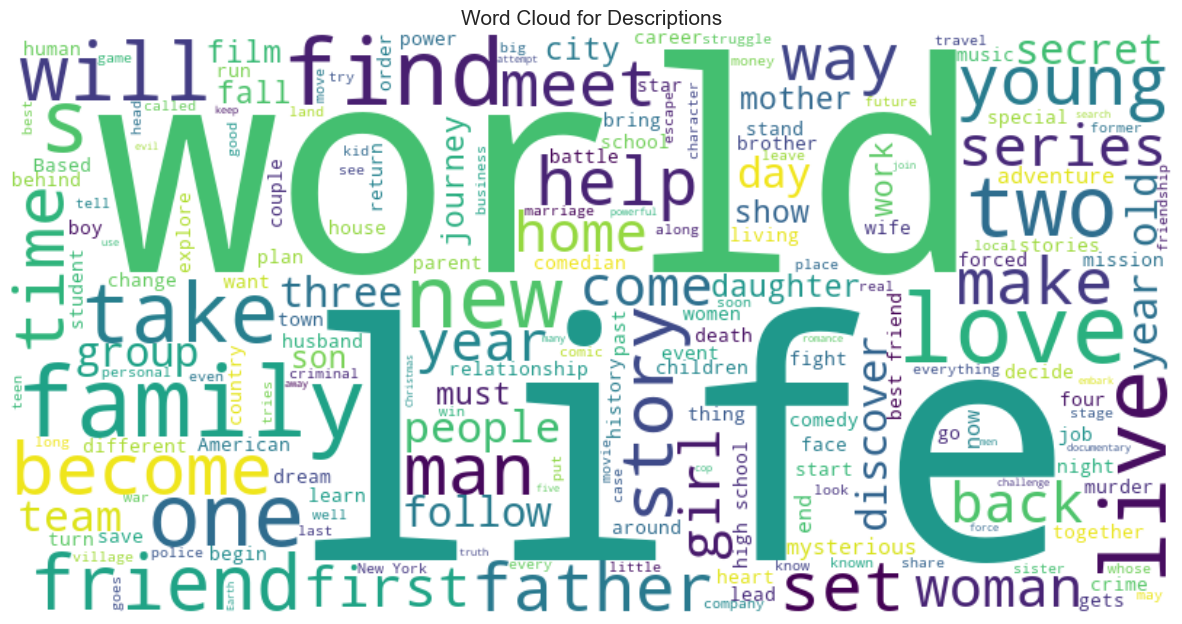

In [27]:


# Combine all descriptions into one large string
all_descriptions = ' '.join(titles_df['description'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Descriptions", fontsize=15)
plt.show()


We use word clouds to look at common words in descriptions such as "life", "family", "world", "young" and other words that are more common in descriptions.

### - Handle text data (text processing) and simplify complex data (dimensionality  reduction)

In [28]:
nltk.download('punkt')
# Using TF-IDF to vectorize the description column
vectorizer = TfidfVectorizer(max_features=1000,tokenizer=nltk.word_tokenize, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(titles_df['description'])

# Using PCA to reduce dimensionality
pca = PCA(n_components=3)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

# Convert the PCA components to a dataframe
tfidf_pca_df = pd.DataFrame(tfidf_pca, columns=[f'pc_{i}' for i in range(1, 4)])

# Concatenate the PCA components to the original dataframe
titles_df.reset_index(drop=True, inplace=True)  # Resetting index to ensure proper concatenation
titles_df = pd.concat([titles_df, tfidf_pca_df], axis=1)

titles_df.head()


[nltk_data] Downloading package punkt to /Users/tianhao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/tianhao/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,production_countries_list,pc_1,pc_2,pc_3
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,tt0075314,8.2,808582.0,40.965,8.179,[US],-0.137990,0.012238,0.054870
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,tt0068473,7.7,107673.0,10.010,7.300,[US],-0.054407,-0.065725,-0.020666
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,tt0071853,8.2,534486.0,15.461,7.811,[GB],0.426529,-0.064872,0.119047
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,Unknown,150,"['war', 'action']","['GB', 'US']",0.0,tt0061578,7.7,72662.0,20.398,7.600,"[GB, US]",-0.007914,0.003446,0.053571
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306,[GB],0.081850,-0.041008,0.181577


- 使用 TF-IDF 向量化 description 列。
- 由于 TF-IDF 可能产生大量的特征，使用主成分分析 (PCA) 进行降维，并使用PCA降低了维度，从而得到了3个主成分特征（pc_1 到 pc_3）

### - Converting data (encoding)

In [29]:


# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_countries = MultiLabelBinarizer()

# Convert string representation of list to actual list
titles_df['genres_list'] = titles_df['genres'].apply(ast.literal_eval)
titles_df['production_countries_list'] = titles_df['production_countries'].apply(ast.literal_eval)

# Perform one-hot encoding using MultiLabelBinarizer
genres_encoded = mlb.fit_transform(titles_df['genres_list'])
countries_encoded = mlb_countries.fit_transform(titles_df['production_countries_list'])

# Convert the encoded data to a DataFrame and set the column names
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
countries_df = pd.DataFrame(countries_encoded, columns=mlb_countries.classes_)

# Concatenate the one-hot encoded genres to the original dataframe
titles_df = pd.concat([titles_df, genres_df,countries_df], axis=1)


titles_df.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,...,0,0,1,0,0,0,0,0,0,0
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,...,0,0,1,0,0,0,0,0,0,0
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,...,0,0,0,0,0,0,0,0,0,0
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,Unknown,150,"['war', 'action']","['GB', 'US']",0.0,...,0,0,1,0,0,0,0,0,0,0
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Convert the code_columns to categorical codes

code_columns = ['type', 'age_certification']
for col in code_columns:
    titles_df[col] = pd.Categorical(titles_df[col]).codes
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
0,tm84618,Taxi Driver,0,A mentally unstable Vietnam War veteran works ...,1976,4,114,"['drama', 'crime']",['US'],0.0,...,0,0,1,0,0,0,0,0,0,0
1,tm154986,Deliverance,0,Intent on seeing the Cahulawassee River before...,1972,4,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,...,0,0,1,0,0,0,0,0,0,0
2,tm127384,Monty Python and the Holy Grail,0,"King Arthur, accompanied by his squire, recrui...",1975,2,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,...,0,0,0,0,0,0,0,0,0,0
3,tm120801,The Dirty Dozen,0,12 American military prisoners in World War II...,1967,11,150,"['war', 'action']","['GB', 'US']",0.0,...,0,0,1,0,0,0,0,0,0,0
4,ts22164,Monty Python's Flying Circus,1,A British sketch comedy series with the shows ...,1969,5,30,"['comedy', 'european']",['GB'],4.0,...,0,0,0,0,0,0,0,0,0,0


### - Adjust the data range(scaling)

In [31]:
from sklearn.preprocessing import StandardScaler
# Columns to be scaled
columns_to_scale = ['release_year', 'runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
# Initialize MinMaxScaler
scaler = StandardScaler()
# Apply the scaler to the columns
titles_df[columns_to_scale] = scaler.fit_transform(titles_df[columns_to_scale])
# Show the updated dataset with scaled values
titles_df.describe()

,type,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,pc_1,...,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
count,5129.000000,5.129000e+03,5129.000000,5.129000e+03,5129.000000,5.129000e+03,5129.000000,5.129000e+03,5.129000e+03,5.129000e+03,...,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000
mean,0.362449,5.940353e-15,7.667187,-1.108275e-16,0.818873,-5.541374e-17,0.000000,4.156031e-17,-9.004733e-16,3.186290e-17,...,0.000390,0.000975,0.414506,0.001365,0.000195,0.000195,0.000390,0.002925,0.007214,0.000195
std,0.480754,1.000097e+00,3.357498,1.000097e+00,2.009665,1.000097e+00,1.000097,1.000097e+00,1.000097e+00,1.152934e-01,...,0.019745,0.031210,0.492685,0.036921,0.013963,0.013963,0.019745,0.054005,0.084636,0.013963
min,0.000000,-8.852599e+00,0.000000,-2.042149e+00,0.000000,-4.265291e+00,-0.249588,-2.756005e-01,-5.082523e+00,-1.745907e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-4.078951e-02,5.000000,-8.507737e-01,0.000000,-6.210147e-01,-0.243366,-2.458073e-01,-6.324744e-01,-7.550879e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.434624e-01,7.000000,1.852046e-01,0.000000,7.313320e-02,-0.224280,-1.949442e-01,6.557237e-02,-2.421335e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.277143e-01,11.000000,6.772943e-01,1.000000,6.805126e-01,-0.144235,-7.618169e-02,5.891075e-01,6.703202e-02,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.119663e-01,11.000000,3.785229e+00,42.000000,2.589419e+00,23.267010,2.638053e+01,2.770504e+00,7.376125e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
0,tm84618,Taxi Driver,0,A mentally unstable Vietnam War veteran works ...,-5.725828,4,0.910389,"['drama', 'crime']",['US'],0.0,...,0,0,1,0,0,0,0,0,0,0
1,tm154986,Deliverance,0,Intent on seeing the Cahulawassee River before...,-6.294332,4,0.780892,"['drama', 'action', 'thriller', 'european']",['US'],0.0,...,0,0,1,0,0,0,0,0,0,0
2,tm127384,Monty Python and the Holy Grail,0,"King Arthur, accompanied by his squire, recrui...",-5.867954,2,0.314702,"['fantasy', 'action', 'comedy']",['GB'],0.0,...,0,0,0,0,0,0,0,0,0,0
3,tm120801,The Dirty Dozen,0,12 American military prisoners in World War II...,-7.004962,11,1.842770,"['war', 'action']","['GB', 'US']",0.0,...,0,0,1,0,0,0,0,0,0,0
4,ts22164,Monty Python's Flying Circus,1,A British sketch comedy series with the shows ...,-6.720710,5,-1.265165,"['comedy', 'european']",['GB'],4.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Drop the columns that are not required for the model because they are encoded
clean_titles_df = titles_df.drop(['description',"title","id","genres","production_countries","imdb_id","production_countries_list","genres_list"],axis=1)

#### Use of supervised and unsupervised models

In [34]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = clean_titles_df.drop("tmdb_popularity", axis=1)
y = clean_titles_df["tmdb_popularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((4103, 135), (1026, 135))

In [35]:


# Define a function to evaluate regression model
def evaluate_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# 1. Linear Regression
# For linear regression, we'll just fit the model as there aren't hyperparameters to tune for a basic linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_mse = evaluate_regression(lr, X_test, y_test)

# 2. Decision Tree Regressor
tree_params = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree = DecisionTreeRegressor()
tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='neg_mean_squared_error')
tree_grid.fit(X_train, y_train)
tree_mse = evaluate_regression(tree_grid.best_estimator_, X_test, y_test)

# 3. KNN Regressor
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)
knn_mse = evaluate_regression(knn_grid.best_estimator_, X_test, y_test)



In [36]:
print("tree_best_params",tree_grid.best_params_)
print("knn_best_params",knn_grid.best_params_)
print('Linear Regression MSE: {:.4f}\nDecision Tree MSE: {:.4f}\nKNN MSE: {:.4f}'.format(lr_mse, tree_mse, knn_mse))

tree_best_params {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
knn_best_params {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Linear Regression MSE: 0.9637
Decision Tree MSE: 1.1238
KNN MSE: 0.8738


# use unsupervised models

In [37]:


# use kmeans to cluster the data from ['runtime', 'release_year', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score' and 'genres'] and make a new column called 'cluster'

# Load data
data = pd.read_csv('./titles.csv')

# Extract genres from string format
data['genres'] = data['genres'].str.strip("[]").str.replace("'", "").str.split(", ")

# Solo thermal coding of genres
genres_encoded = pd.get_dummies(data['genres'].explode()).groupby(level=0).sum()

# Merge solo thermal encoded genres with raw data
data = pd.concat([data, genres_encoded], axis=1)

# Selection of features for clustering
features = ['runtime', 'release_year', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'] + list(genres_encoded.columns)

# Create pipelines for data preprocessing
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())                  # Standardized features
])

# Apply pre-processing to data
data_preprocessed = pipeline.fit_transform(data[features])


/Users/tianhao/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tianhao/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tianhao/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tianhao/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

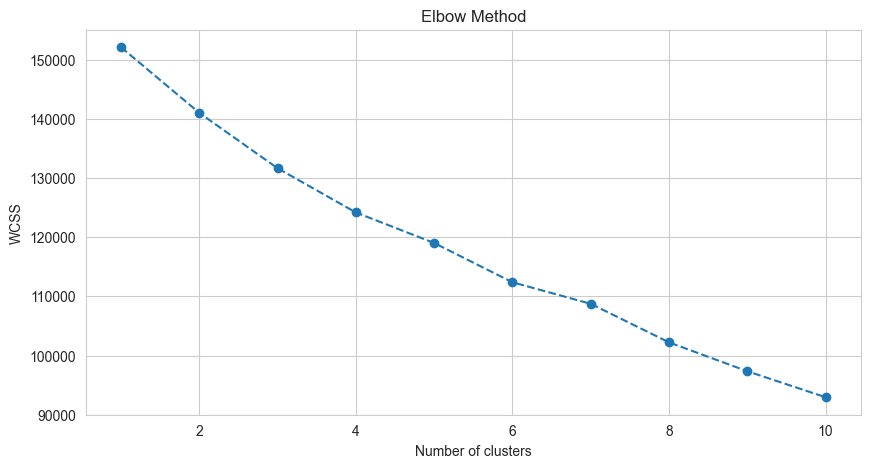

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the internal sum of squares for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_preprocessed)
    wcss.append(kmeans.inertia_)

# Drawing the elbow
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [39]:
# Selection of the optimal k value 6
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_preprocessed)
data['Cluster'] = clusters


/Users/tianhao/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,horror,music,reality,romance,scifi,sport,thriller,war,western,Cluster
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],['US'],1.0,...,0,0,0,0,0,0,0,0,0,2
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",['US'],NaN,...,0,0,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",['US'],NaN,...,0,0,0,0,0,0,1,0,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[fantasy, action, comedy]",['GB'],NaN,...,0,0,0,0,0,0,0,0,0,3
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"[war, action]","['GB', 'US']",NaN,...,0,0,0,0,0,0,0,1,0,0


# use model predict tmdb_popularity

In [41]:
# Divide the popularity
tmdb_popularity = clean_titles_df['tmdb_popularity'].values


q1 = np.percentile(tmdb_popularity, 33)  
q2 = np.percentile(tmdb_popularity, 67)  
# Use the cut() function to divide 'tmdb_popularity' into three levels based on the quartiles
clean_titles_df['tmdb_popularity_rank'] = pd.cut(tmdb_popularity, bins=[tmdb_popularity.min()-1, q1, q2, tmdb_popularity.max()+1], labels=[0, 1, 2])

clean_titles_df.head()

,type,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,pc_1,...,UA,US,UY,VA,VE,VN,XX,ZA,ZW,tmdb_popularity_rank
0,0,-5.725828,4,0.910389,0.0,1.461429,8.038602,0.197679,1.181575,-0.137990,...,0,1,0,0,0,0,0,0,0,2
1,0,-6.294332,4,0.780892,0.0,1.027587,0.854046,-0.165268,0.414596,-0.054407,...,0,1,0,0,0,0,0,0,0,1
2,0,-5.867954,2,0.314702,0.0,1.461429,5.229024,-0.101355,0.860473,0.426529,...,0,0,0,0,0,0,0,0,0,2
3,0,-7.004962,11,1.842770,0.0,1.027587,0.495171,-0.043469,0.676363,-0.007914,...,0,1,0,0,0,0,0,0,0,2
4,1,-6.720710,5,-1.265165,4.0,1.982040,0.502982,-0.076076,1.292390,0.081850,...,0,0,0,0,0,0,0,0,0,2


In [42]:
# Splitting the dataset into training and testing sets
X = clean_titles_df.drop(["tmdb_popularity_rank", 'tmdb_popularity'], axis=1)
y = clean_titles_df["tmdb_popularity_rank"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Use the model predict the tmbd_popularity_rank
tree_params = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
tree = tree = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree, tree_params, cv=5)
tree_grid.fit(X_train, y_train)
tree_accuracy = tree_grid.best_estimator_.score(X_test, y_test)

print(f"accuracy:{tree_accuracy}")

accuracy:0.6715399610136452


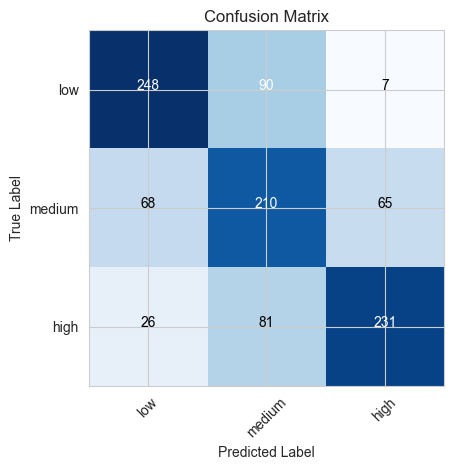

In [44]:
# draw the confusion Matrix
y_pred = tree_grid.best_estimator_.predict(X_test)

# confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
classes = ["low", "medium", "high"]  
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 3.0 
rows, cols = cm.shape[0], cm.shape[1]
 
for i in range(rows):
    for j in range(cols):
        color = "white" if cm[i, j] > thresh else "black"
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color=color)


plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
